## Class 3
Comparison of a galaxy spectrum with our analytic model

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.io import fits
from astropy.cosmology import WMAP9 as cosmo
from astropy.modeling import models

from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy import constants as const

In [21]:
def openfile(filename='filename'):
    data_=fits.open(filename)
    flux = data_[1].data['flux'] # units = 10^-17 erg/(cm^2 s angstrom)
    wav = 10**(data_[1].data['loglam']) # units = angstrom
    #plt.plot(wav, flux);
    return wav, flux

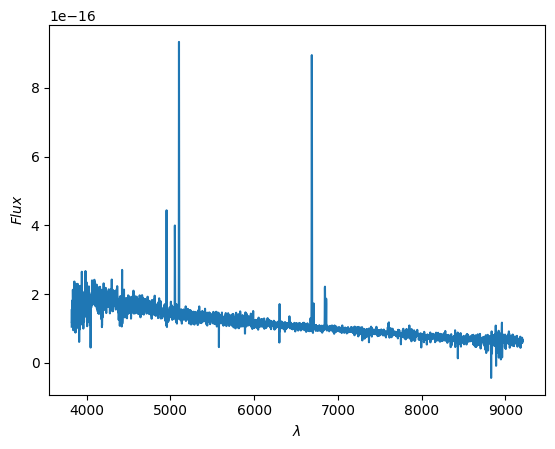

Wavelength of the second peak: 6688.05712890625


In [22]:
wav= openfile('S1.fits')[0]
flux=openfile('S1.fits')[1]/10**17
plt.plot(wav,flux)
plt.xlabel('$\lambda$')
plt.ylabel('$Flux$')
plt.show()
second_peak=np.sort(flux)[-2]
print('Wavelength of the second peak:', wav[flux==second_peak].item())
z=(wav[flux==second_peak]-6564.6)/6564.6
Lum_distance = np.array(cosmo.luminosity_distance(z).to(u.cm))

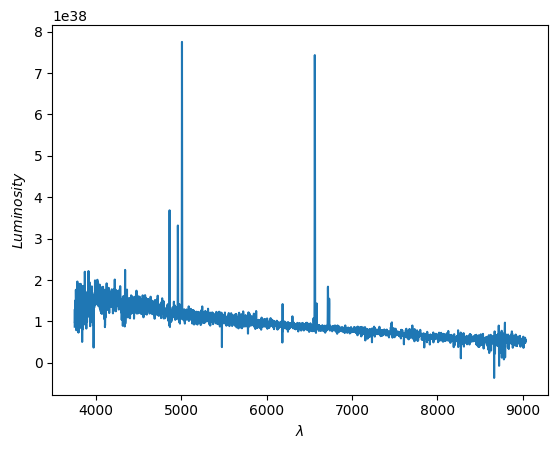

In [23]:
L=4*np.pi*Lum_distance**2*flux*(1+z)
plt.plot(wav/(1+z),L)
plt.xlabel('$\lambda$')
plt.ylabel('$Luminosity$')
plt.show()

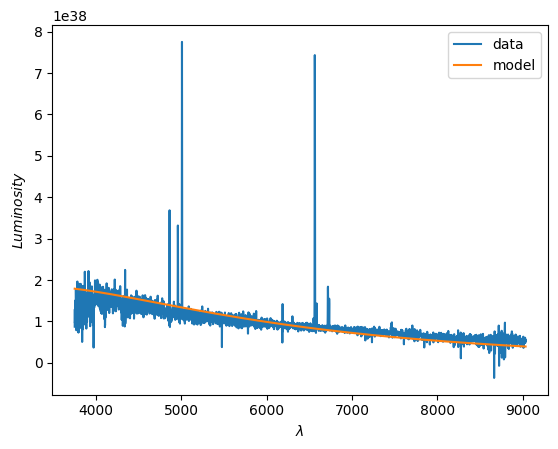

In [24]:
Mmin = 0.1
Mmax = 100
M=np.linspace(Mmin, Mmax, 1000)
dM=(Mmax-Mmin)/1000
Mtot=2e7

def SPmodel(arrayM, Mtot, wavelenght, age_gal, BBtot):
    flux_tot = BBtot(wavelenght)

    xi=Mtot*(-0.35)*((1/(Mmax**(-0.35)-Mmin**(-0.35))))
    for mass in arrayM:
        age_mass = mass**(-2.5)*10
        L=mass**(3.5)
        if mass<2 :
            n = 4
        else:
            n = 18
        r = mass**((n-1)/(n+3)) # solar units
        T = (L/(r**2))**(1/4)*5700  # units u.K
        N=xi*mass**(-2.35)*dM

        if age_gal < age_mass:
            
            BB = models.BlackBody(temperature=T*u.K, scale = 1.*u.erg / (u.cm**2 *u.AA *u.s *u.sr))
            flux = N*L*BB(wavelenght)/BB.bolometric_flux.value
            flux_tot = flux_tot + flux
    return flux_tot


wl = np.linspace(np.min(wav), np.max(wav), 10000)
t=0.5

BBtotal = models.BlackBody(temperature=1000*u.K, scale = 0*u.erg / (u.cm**2 *u.AA *u.s *u.sr))
flux_modello = SPmodel(M, Mtot, wl, t, BBtotal)

plt.plot(wav/(1+z),L, label='data')
plt.plot(wl/(1+z), flux_modello*4*np.pi*const.L_sun.to(u.erg/u.s), label='model')
plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('$Luminosity$')
plt.show()